<a href="https://colab.research.google.com/github/allenbiji/demo/blob/main/Weather_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import statsmodels.api as sm

In [2]:
! gdown --id 15aU0c1NQ1AERWkbm_TlvQdT27Xk0QBve

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15aU0c1NQ1AERWkbm_TlvQdT27Xk0QBve
To: /content/weather.zip
100% 13.8M/13.8M [00:00<00:00, 53.5MB/s]


In [3]:
!unzip -q C:\Users\allen\Downloads\weather.zip

unzip:  cannot find or open C:UsersallenDownloadsweather.zip, C:UsersallenDownloadsweather.zip.zip or C:UsersallenDownloadsweather.zip.ZIP.


In [4]:
from google.colab import files

# Upload the files
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print('Uploaded file "{name}" with length {length} bytes'.format(
        name=filename, length=len(uploaded[filename])))

Saving weather.zip to weather (1).zip
Uploaded file "weather (1).zip" with length 13843658 bytes


In [5]:
a=!unzip -q weather.zip

In [6]:
df=pd.read_csv('weather_data.csv')

In [7]:
df.head()

,CITY_NAME,LATITUDE,LONGITUDE,REGION,DEW_POINT_IN_C,DEW_POINT_IN_F,GUST_KPH,GUST_MPH,HEATINDEX_IN_C,HEATINDEX_IN_F,HUMIDITY,CLOUD,TEMP_C,TEMP_F,CLOUD_TEXT,LAST_UPDATED
0,Algonac,42.64,-82.56,Michigan,15.8,60.4,18.9,11.7,21.7,71.0,73,100,21.2,70.2,Overcast,20-07-2024 21:45
1,Allenton,42.93,-82.92,Michigan,14.8,58.6,12.9,8.0,21.0,69.8,72,7,20.5,68.9,Sunny,20-07-2024 21:45
2,Almont,42.92,-83.04,Michigan,14.6,58.4,16.6,10.3,20.8,69.4,72,10,20.3,68.5,Sunny,20-07-2024 21:45
3,Armada,42.85,-82.92,Michigan,14.8,58.6,12.9,8.0,21.0,69.8,72,7,20.5,68.9,Sunny,20-07-2024 21:45
4,Avoca,43.06,-82.69,Michigan,15.1,59.1,18.1,11.3,20.5,68.9,76,14,19.9,67.9,Sunny,20-07-2024 21:45


In [8]:
df.describe()

,LATITUDE,LONGITUDE,DEW_POINT_IN_C,DEW_POINT_IN_F,GUST_KPH,GUST_MPH,HEATINDEX_IN_C,HEATINDEX_IN_F,HUMIDITY,CLOUD,TEMP_C,TEMP_F
count,820736.000000,820736.000000,820736.000000,820736.000000,820736.000000,820736.000000,820736.000000,820736.000000,820736.000000,820736.000000,820736.000000,820736.000000
mean,43.436452,-84.721758,11.964328,53.528096,17.282278,10.738045,18.663930,65.594739,68.059383,21.205135,19.066884,66.321556
std,1.332266,1.456027,2.319439,4.174117,7.077206,4.398135,4.690473,8.442643,17.827828,28.828424,4.575282,8.235798
min,41.730000,-90.160000,3.800000,38.900000,3.600000,2.200000,8.600000,47.500000,27.000000,0.000000,5.000000,41.000000
25%,42.437500,-85.630000,10.500000,51.000000,12.000000,7.500000,14.700000,58.500000,52.000000,0.000000,15.300000,59.500000
50%,42.995000,-84.550000,11.800000,53.300000,16.600000,10.300000,18.200000,64.700000,68.000000,4.000000,19.400000,66.900000
75%,44.060000,-83.520000,13.500000,56.300000,21.900000,13.600000,23.100000,73.600000,84.000000,40.000000,22.800000,73.000000
max,47.320000,-82.460000,21.000000,69.800000,54.700000,34.000000,27.900000,82.200000,100.000000,100.000000,29.500000,85.100000


In [9]:
df.isnull().sum()

CITY_NAME         0
LATITUDE          0
LONGITUDE         0
REGION            0
DEW_POINT_IN_C    0
DEW_POINT_IN_F    0
GUST_KPH          0
GUST_MPH          0
HEATINDEX_IN_C    0
HEATINDEX_IN_F    0
HUMIDITY          0
CLOUD             0
TEMP_C            0
TEMP_F            0
CLOUD_TEXT        0
LAST_UPDATED      0
dtype: int64

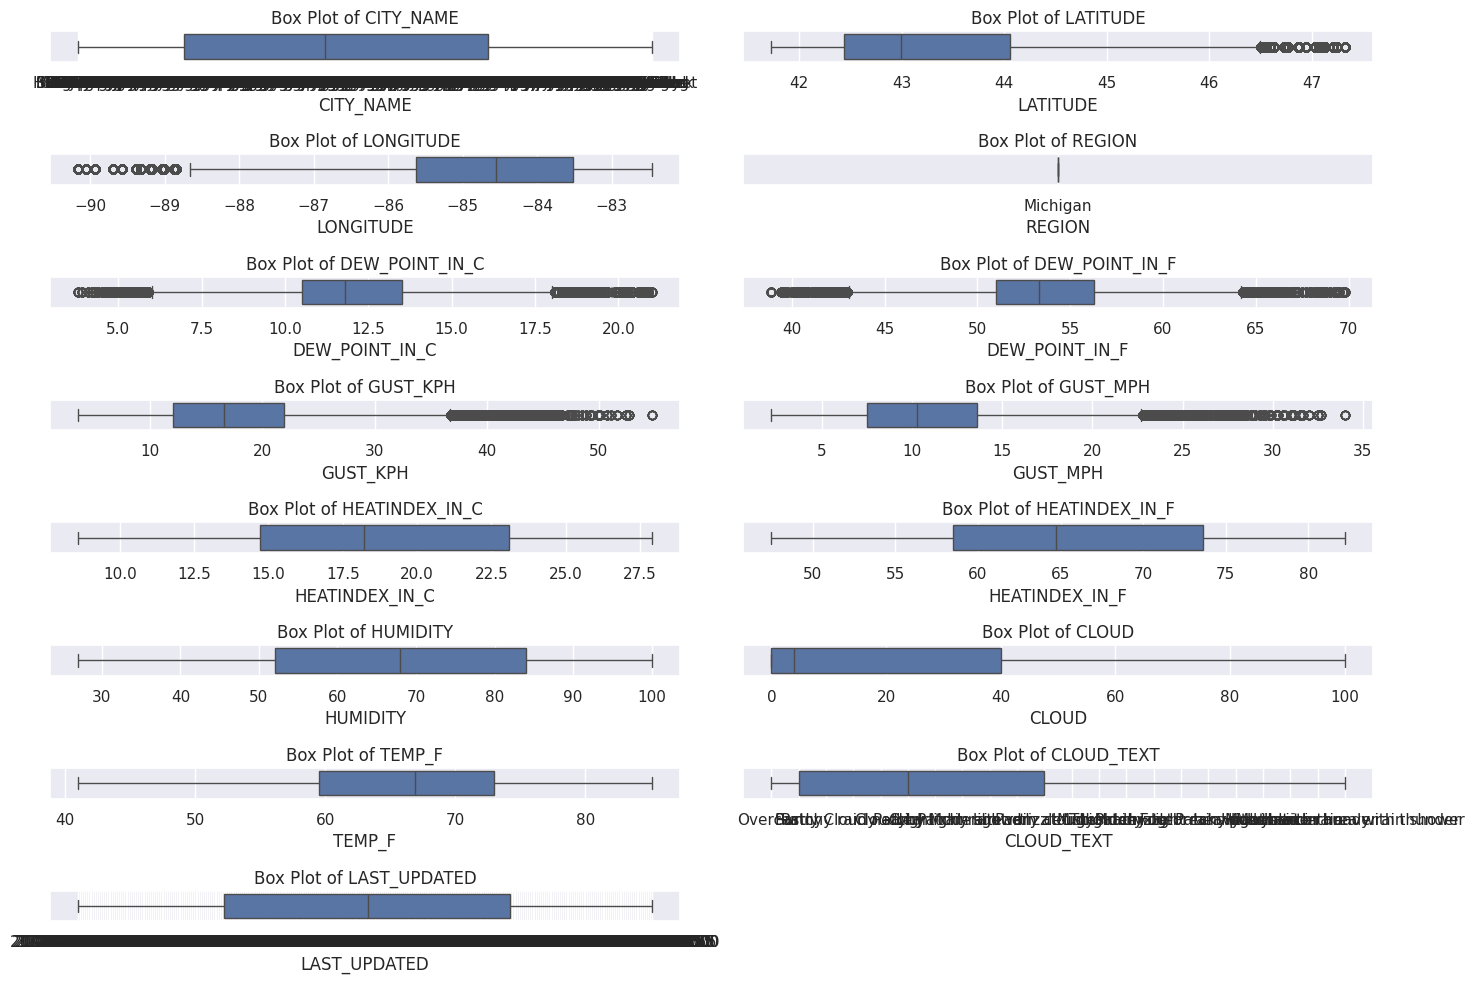

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# List of columns to visualize (excluding temperature)
columns = df.columns.drop('TEMP_C')  # Replace 'Temperature' with the actual column name for temperature

# Generate box plots
for i, column in enumerate(columns, 1):
    plt.subplot(len(columns) // 2 + 1, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()


In [11]:
# Identify columns to check for outliers
columns = df.select_dtypes(include=['float64', 'int64']).columns  # Replace 'Temperature' with the actual column name for temperature if different

# Initialize a copy of the dataframe for outlier removal
weather_data_cleaned = df.copy()

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to remove outliers
    weather_data_cleaned = weather_data_cleaned[(weather_data_cleaned[column] >= lower_bound) &
                                                (weather_data_cleaned[column] <= upper_bound)]

# Display the first few rows of the cleaned dataframe
print(weather_data_cleaned.head())

# Display the shape of the dataframe before and after cleaning
print(f'Original data shape: {df.shape}')
print(f'Cleaned data shape: {weather_data_cleaned.shape}')


  CITY_NAME  LATITUDE  LONGITUDE    REGION  DEW_POINT_IN_C  DEW_POINT_IN_F  \
0   Algonac     42.64     -82.56  Michigan            15.8            60.4   
1  Allenton     42.93     -82.92  Michigan            14.8            58.6   
2    Almont     42.92     -83.04  Michigan            14.6            58.4   
3    Armada     42.85     -82.92  Michigan            14.8            58.6   
4     Avoca     43.06     -82.69  Michigan            15.1            59.1   

   GUST_KPH  GUST_MPH  HEATINDEX_IN_C  HEATINDEX_IN_F  HUMIDITY  CLOUD  \
0      18.9      11.7            21.7            71.0        73    100   
1      12.9       8.0            21.0            69.8        72      7   
2      16.6      10.3            20.8            69.4        72     10   
3      12.9       8.0            21.0            69.8        72      7   
4      18.1      11.3            20.5            68.9        76     14   

   TEMP_C  TEMP_F CLOUD_TEXT      LAST_UPDATED  
0    21.2    70.2   Overcast  20-07-2

In [12]:
weather_data_cleaned.describe()

,LATITUDE,LONGITUDE,DEW_POINT_IN_C,DEW_POINT_IN_F,GUST_KPH,GUST_MPH,HEATINDEX_IN_C,HEATINDEX_IN_F,HUMIDITY,CLOUD,TEMP_C,TEMP_F
count,777535.000000,777535.000000,777535.000000,777535.000000,777535.000000,777535.000000,777535.000000,777535.000000,777535.000000,777535.00000,777535.000000,777535.000000
mean,43.292747,-84.558973,11.988371,53.571342,17.024708,10.578076,18.691849,65.644987,67.983481,21.18955,19.123653,66.423755
std,1.181119,1.246247,2.212298,3.981133,6.772342,4.208782,4.699138,8.458238,17.854629,28.87766,4.569195,8.224793
min,41.730000,-88.660000,6.100000,43.100000,3.600000,2.200000,8.600000,47.500000,27.000000,0.00000,5.100000,41.200000
25%,42.420000,-85.530000,10.600000,51.000000,11.700000,7.200000,14.700000,58.500000,52.000000,0.00000,15.300000,59.500000
50%,42.950000,-84.450000,11.800000,53.300000,16.600000,10.300000,18.200000,64.800000,68.000000,3.00000,19.400000,66.900000
75%,43.810000,-83.470000,13.500000,56.200000,21.900000,13.600000,23.200000,73.700000,84.000000,44.00000,22.900000,73.200000
max,46.490000,-82.460000,17.900000,64.200000,36.600000,22.700000,27.900000,82.200000,100.000000,100.00000,29.500000,85.100000


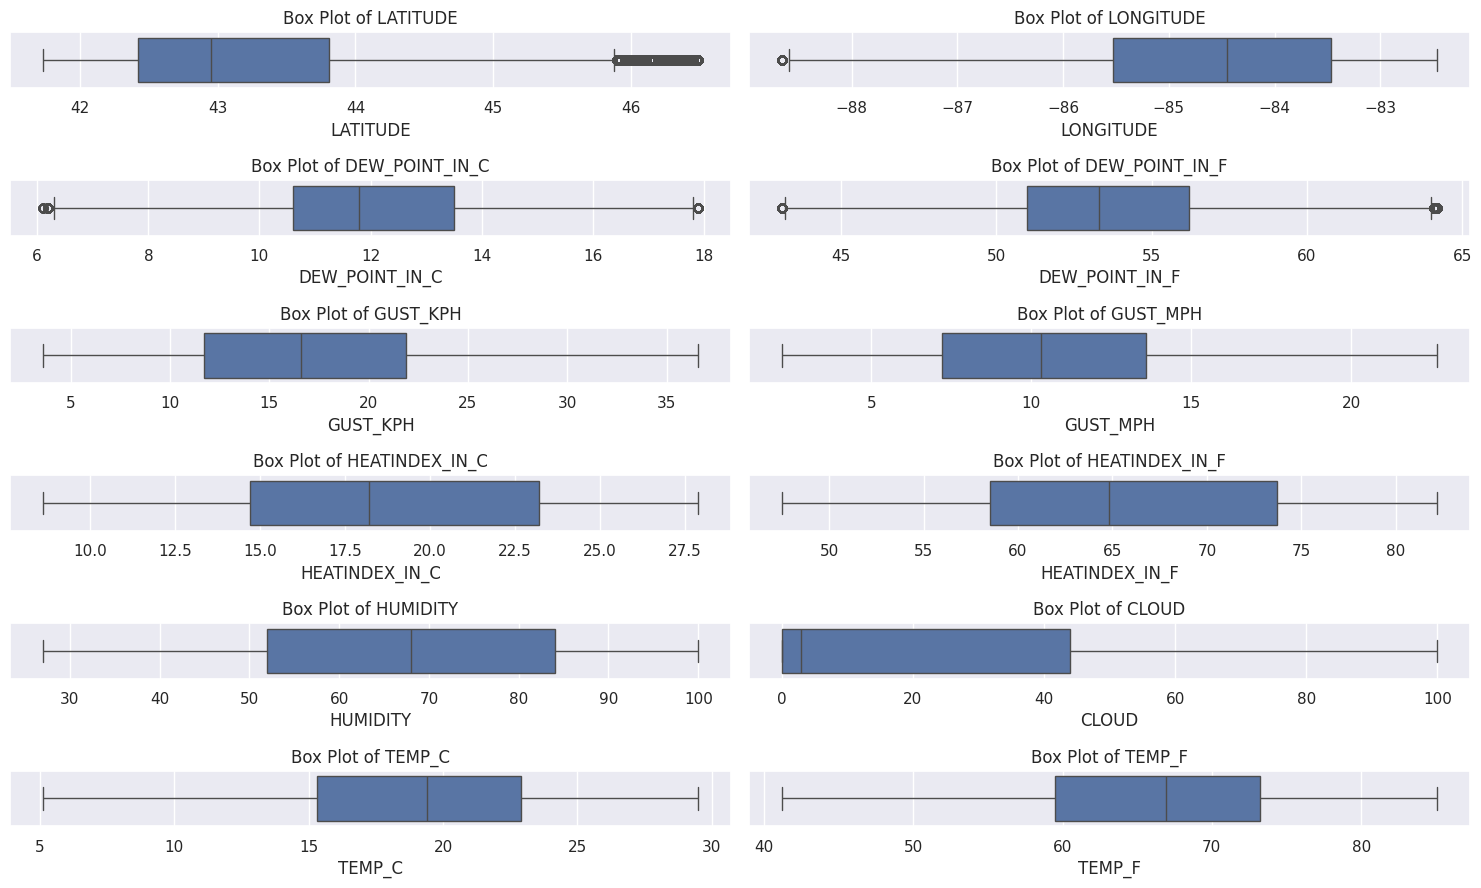

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# List of columns to visualize (excluding temperature)
columns = df.select_dtypes(include=['float64', 'int64']).columns
# Generate box plots
for i, column in enumerate(columns, 1):
    plt.subplot(len(columns) // 2 + 1, 2, i)
    sns.boxplot(x=weather_data_cleaned[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

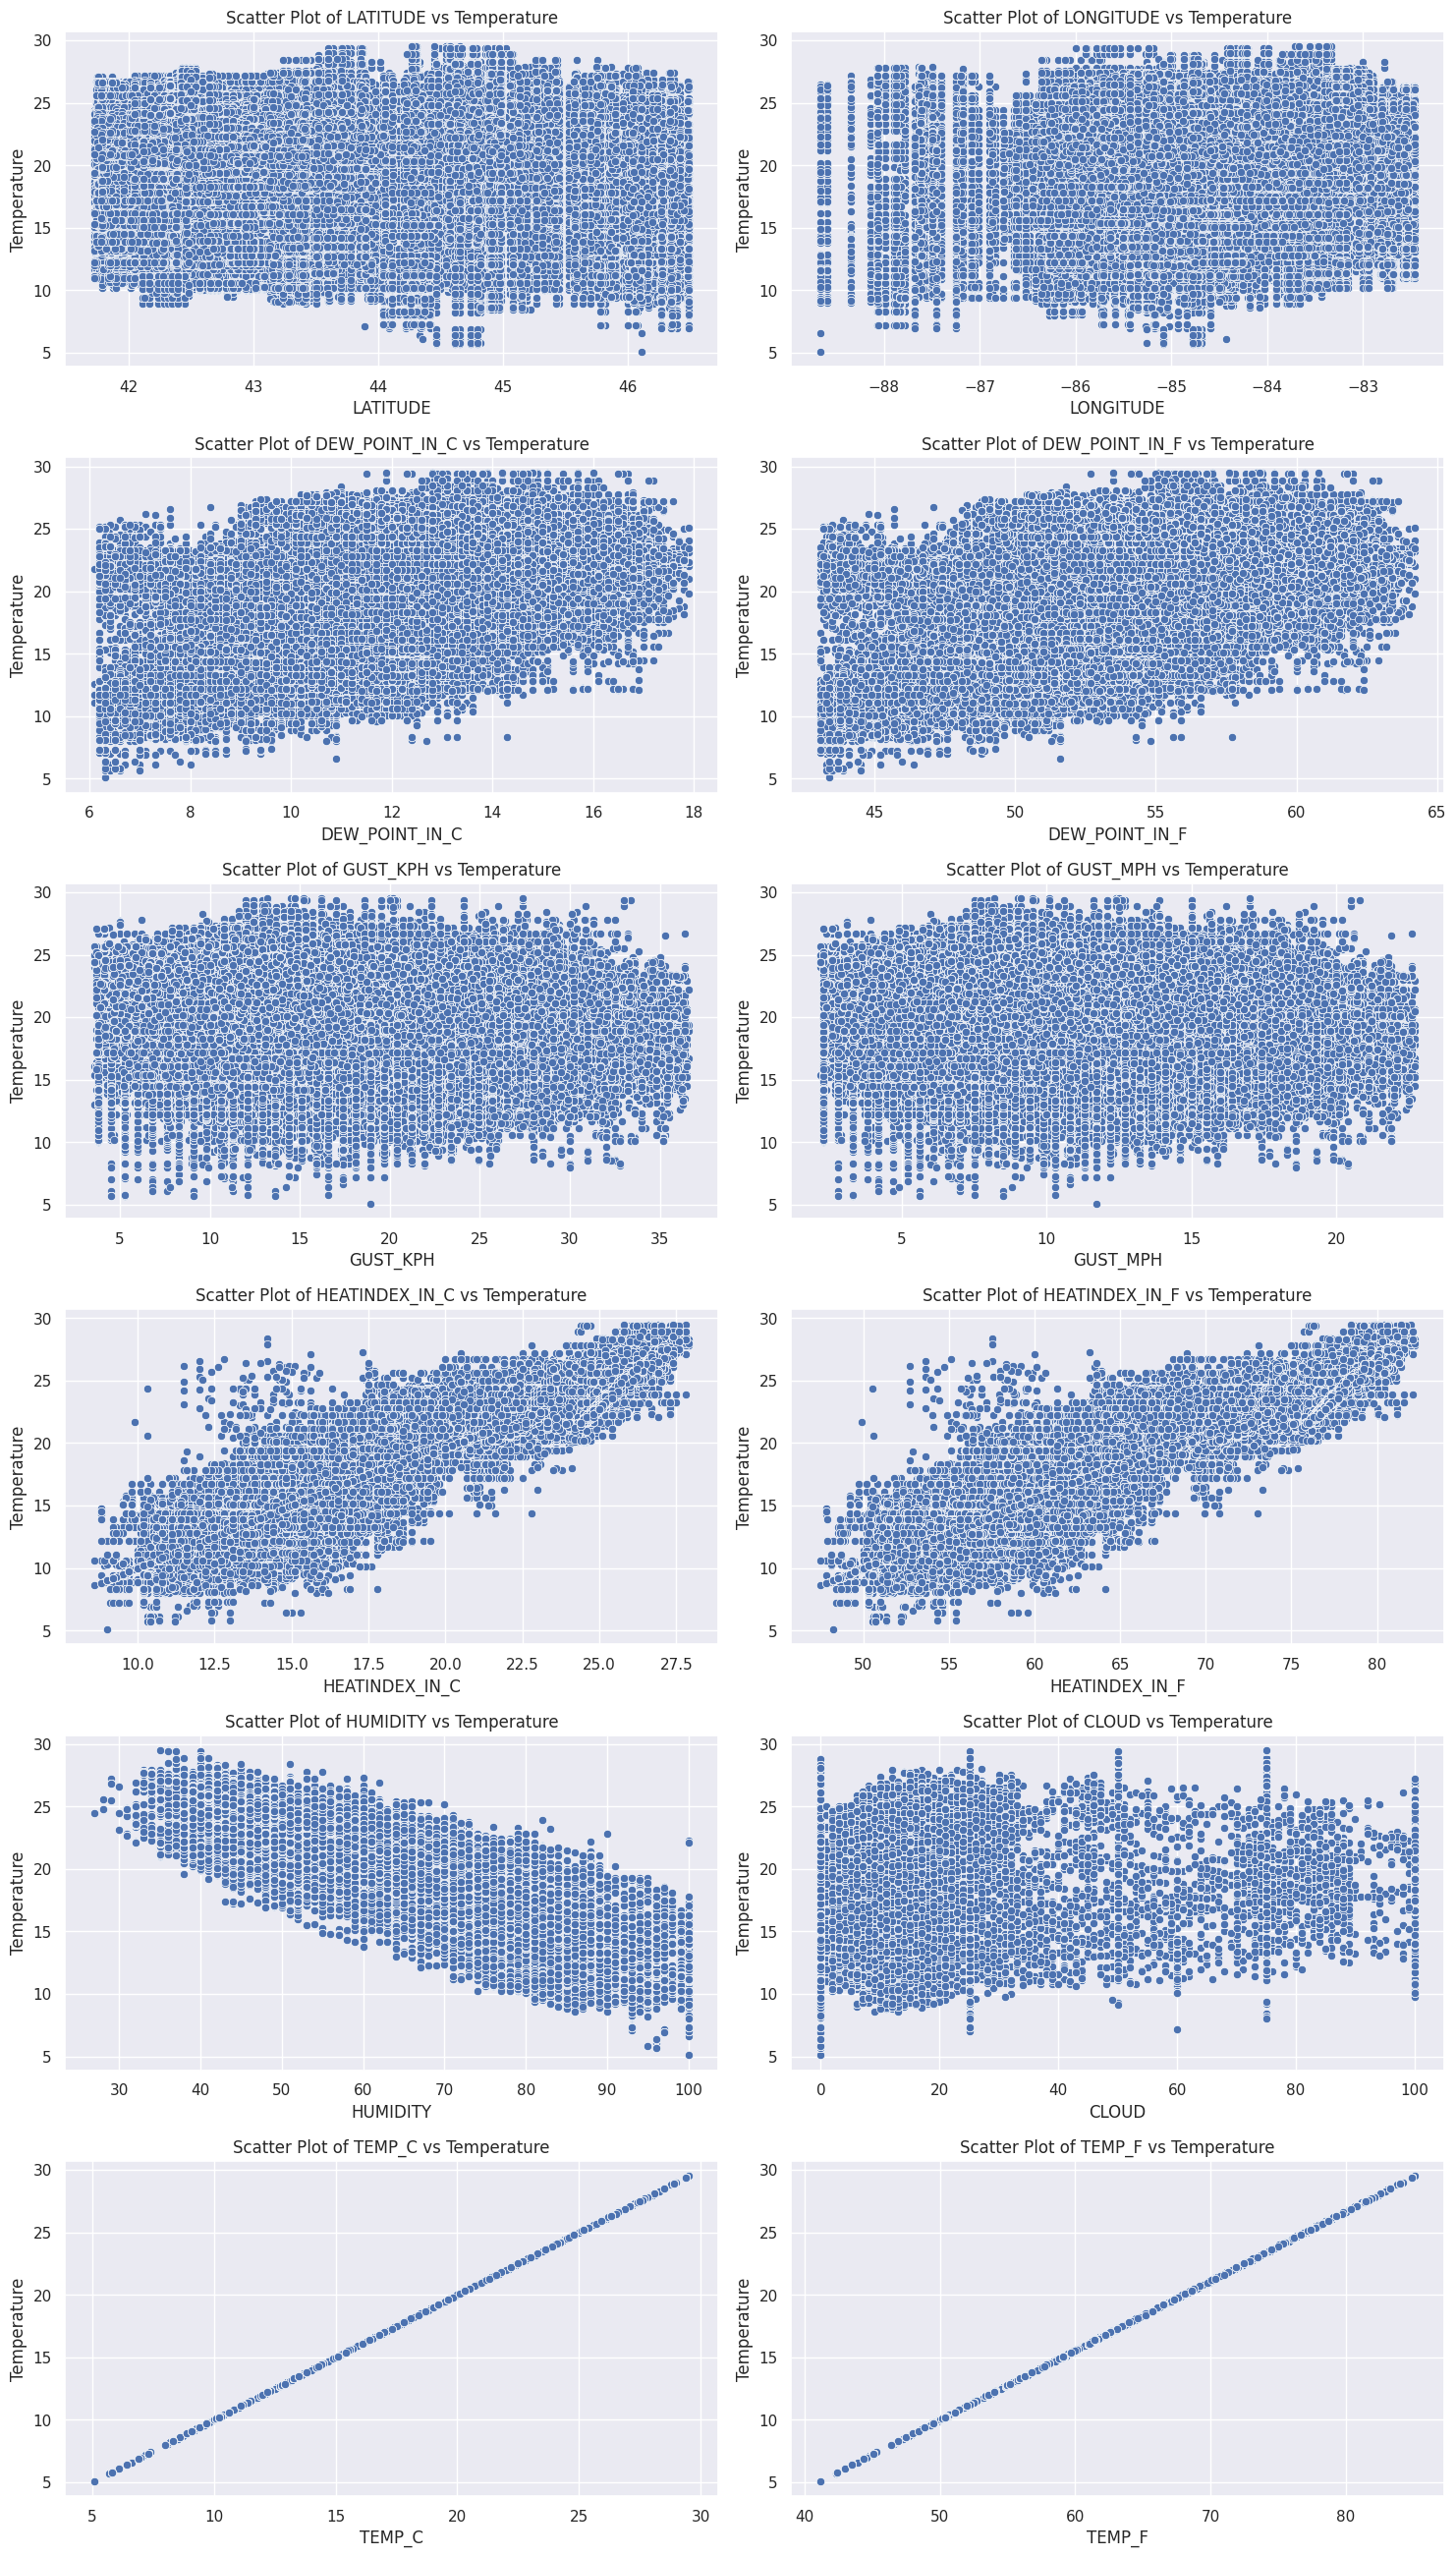

In [14]:
plt.figure(figsize=(15, 30))

for i, column in enumerate(columns, 1):
    plt.subplot(len(columns) // 2 + 1, 2, i)
    sns.scatterplot(x=weather_data_cleaned[column], y=weather_data_cleaned['TEMP_C'])
    plt.title(f'Scatter Plot of {column} vs Temperature')
    plt.xlabel(column)
    plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

In [41]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(weather_data_cleaned[columns])

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers
weather_data_cleaned_final = weather_data_cleaned[~outliers]

# Display the shape of the dataframe before and after cleaning
print(f'Original cleaned data shape: {weather_data_cleaned.shape}')
print(f'Final cleaned data shape: {weather_data_cleaned_final.shape}')
weather_data_cleaned_final

Original cleaned data shape: (777535, 16)
Final cleaned data shape: (775181, 16)


,CITY_NAME,LATITUDE,LONGITUDE,REGION,DEW_POINT_IN_C,DEW_POINT_IN_F,GUST_KPH,GUST_MPH,HEATINDEX_IN_C,HEATINDEX_IN_F,HUMIDITY,CLOUD,TEMP_C,TEMP_F,CLOUD_TEXT,LAST_UPDATED
0,Algonac,42.64,-82.56,Michigan,15.8,60.4,18.9,11.7,21.7,71.0,73,100,21.2,70.2,Overcast,20-07-2024 21:45
1,Allenton,42.93,-82.92,Michigan,14.8,58.6,12.9,8.0,21.0,69.8,72,7,20.5,68.9,Sunny,20-07-2024 21:45
2,Almont,42.92,-83.04,Michigan,14.6,58.4,16.6,10.3,20.8,69.4,72,10,20.3,68.5,Sunny,20-07-2024 21:45
3,Armada,42.85,-82.92,Michigan,14.8,58.6,12.9,8.0,21.0,69.8,72,7,20.5,68.9,Sunny,20-07-2024 21:45
4,Avoca,43.06,-82.69,Michigan,15.1,59.1,18.1,11.3,20.5,68.9,76,14,19.9,67.9,Sunny,20-07-2024 21:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820695,Seney,46.42,-86.05,Michigan,13.6,56.4,15.9,9.9,19.0,66.3,71,7,18.4,65.2,Sunny,20-07-2024 20:30
820696,Shingleton,46.36,-86.45,Michigan,14.3,57.7,15.7,9.8,16.8,62.2,83,17,16.8,62.2,Sunny,20-07-2024 20:30
820697,Skandia,46.35,-87.25,Michigan,14.6,58.2,15.9,9.9,17.9,64.3,80,22,17.8,64.0,Sunny,20-07-2024 20:30
820700,Trenary,46.20,-86.87,Michigan,14.9,58.8,16.2,10.0,19.4,66.8,75,18,18.7,65.7,Sunny,20-07-2024 20:30


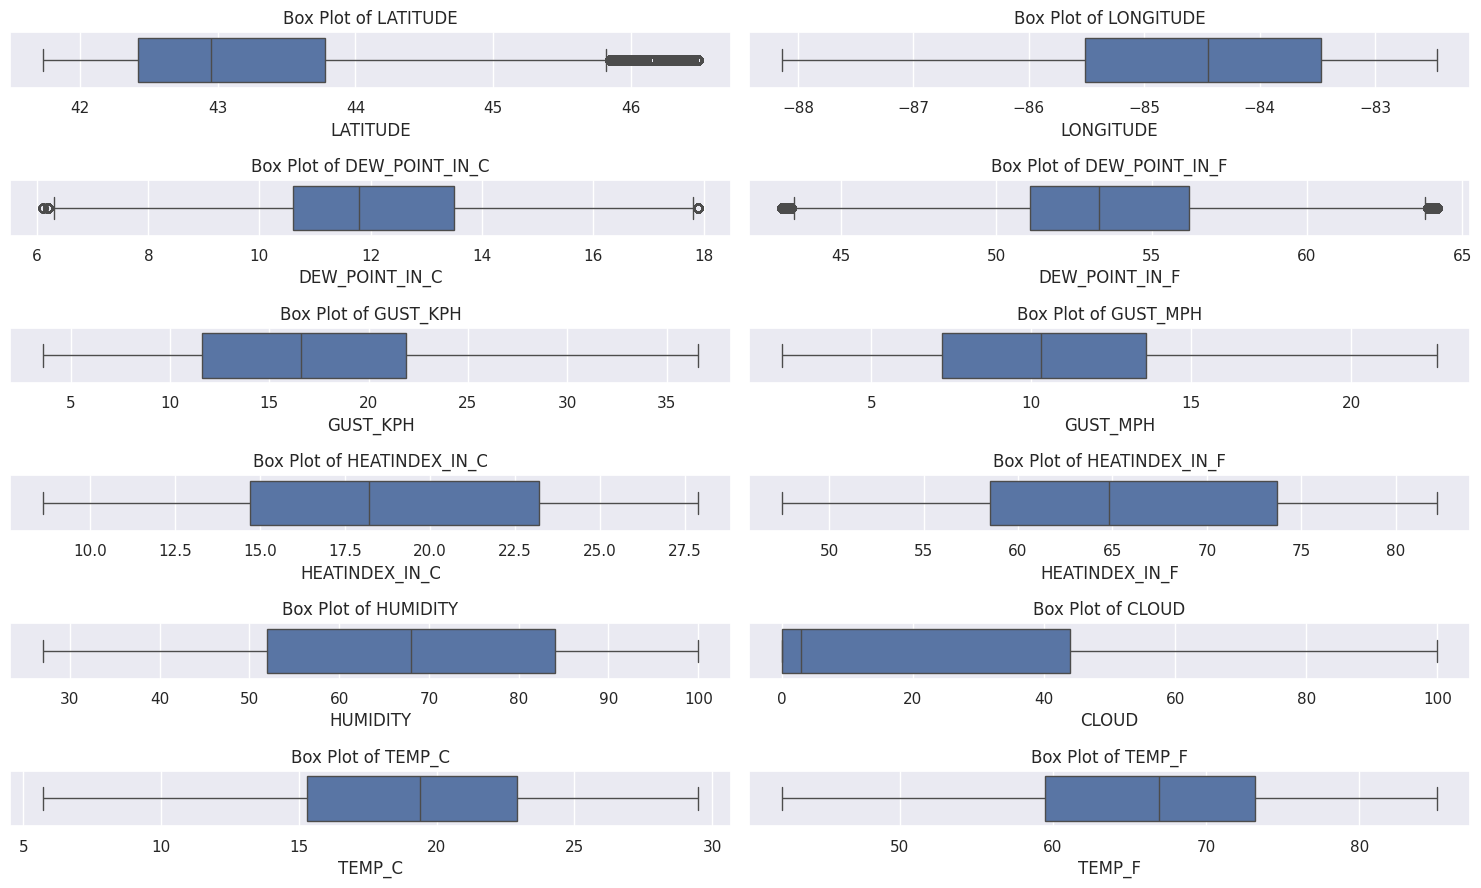

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# List of columns to visualize (excluding temperature)
columns = df.select_dtypes(include=['float64', 'int64']).columns
# Generate box plots
for i, column in enumerate(columns, 1):
    plt.subplot(len(columns) // 2 + 1, 2, i)
    sns.boxplot(x=weather_data_cleaned_final[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

In [17]:
weather_data_cleaned_final.describe()

,LATITUDE,LONGITUDE,DEW_POINT_IN_C,DEW_POINT_IN_F,GUST_KPH,GUST_MPH,HEATINDEX_IN_C,HEATINDEX_IN_F,HUMIDITY,CLOUD,TEMP_C,TEMP_F
count,775181.000000,775181.000000,775181.000000,775181.000000,775181.000000,775181.000000,775181.000000,775181.00000,775181.000000,775181.000000,775181.000000,775181.000000
mean,43.284262,-84.546903,11.992721,53.579158,17.028140,10.580233,18.695665,65.65184,67.979823,21.196017,19.129783,66.434776
std,1.172817,1.228687,2.208401,3.974121,6.780351,4.213746,4.695538,8.45175,17.845781,28.898409,4.565383,8.217943
min,41.730000,-88.140000,6.100000,43.100000,3.600000,2.200000,8.600000,47.50000,27.000000,0.000000,5.700000,42.300000
25%,42.420000,-85.510000,10.600000,51.100000,11.600000,7.200000,14.700000,58.50000,52.000000,0.000000,15.300000,59.500000
50%,42.950000,-84.450000,11.800000,53.300000,16.600000,10.300000,18.200000,64.80000,68.000000,3.000000,19.400000,66.900000
75%,43.780000,-83.470000,13.500000,56.200000,21.900000,13.600000,23.200000,73.70000,84.000000,44.000000,22.900000,73.200000
max,46.490000,-82.460000,17.900000,64.200000,36.600000,22.700000,27.900000,82.20000,100.000000,100.000000,29.500000,85.100000


In [42]:
weather_data_cleaned_final

,CITY_NAME,LATITUDE,LONGITUDE,REGION,DEW_POINT_IN_C,DEW_POINT_IN_F,GUST_KPH,GUST_MPH,HEATINDEX_IN_C,HEATINDEX_IN_F,HUMIDITY,CLOUD,TEMP_C,TEMP_F,CLOUD_TEXT,LAST_UPDATED
0,Algonac,42.64,-82.56,Michigan,15.8,60.4,18.9,11.7,21.7,71.0,73,100,21.2,70.2,Overcast,20-07-2024 21:45
1,Allenton,42.93,-82.92,Michigan,14.8,58.6,12.9,8.0,21.0,69.8,72,7,20.5,68.9,Sunny,20-07-2024 21:45
2,Almont,42.92,-83.04,Michigan,14.6,58.4,16.6,10.3,20.8,69.4,72,10,20.3,68.5,Sunny,20-07-2024 21:45
3,Armada,42.85,-82.92,Michigan,14.8,58.6,12.9,8.0,21.0,69.8,72,7,20.5,68.9,Sunny,20-07-2024 21:45
4,Avoca,43.06,-82.69,Michigan,15.1,59.1,18.1,11.3,20.5,68.9,76,14,19.9,67.9,Sunny,20-07-2024 21:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820695,Seney,46.42,-86.05,Michigan,13.6,56.4,15.9,9.9,19.0,66.3,71,7,18.4,65.2,Sunny,20-07-2024 20:30
820696,Shingleton,46.36,-86.45,Michigan,14.3,57.7,15.7,9.8,16.8,62.2,83,17,16.8,62.2,Sunny,20-07-2024 20:30
820697,Skandia,46.35,-87.25,Michigan,14.6,58.2,15.9,9.9,17.9,64.3,80,22,17.8,64.0,Sunny,20-07-2024 20:30
820700,Trenary,46.20,-86.87,Michigan,14.9,58.8,16.2,10.0,19.4,66.8,75,18,18.7,65.7,Sunny,20-07-2024 20:30


In [49]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assume temperature_C is the target variable
y = weather_data_cleaned_final['TEMP_C']
X = weather_data_cleaned_final.drop(columns=['TEMP_C','CITY_NAME','REGION','CLOUD_TEXT','LAST_UPDATED'])

# Select top 10 features
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]

# Create a new dataframe with the selected features
X_selected = X[selected_features]
print(_selected.head()X)

   LATITUDE  LONGITUDE  DEW_POINT_IN_C  DEW_POINT_IN_F  GUST_MPH  \
0     42.64     -82.56            15.8            60.4      11.7   
1     42.93     -82.92            14.8            58.6       8.0   
2     42.92     -83.04            14.6            58.4      10.3   
3     42.85     -82.92            14.8            58.6       8.0   
4     43.06     -82.69            15.1            59.1      11.3   

   HEATINDEX_IN_C  HEATINDEX_IN_F  HUMIDITY  CLOUD  TEMP_F  
0            21.7            71.0        73    100    70.2  
1            21.0            69.8        72      7    68.9  
2            20.8            69.4        72     10    68.5  
3            21.0            69.8        72      7    68.9  
4            20.5            68.9        76     14    67.9  


In [50]:
X_selected

,LATITUDE,LONGITUDE,DEW_POINT_IN_C,DEW_POINT_IN_F,GUST_MPH,HEATINDEX_IN_C,HEATINDEX_IN_F,HUMIDITY,CLOUD,TEMP_F
0,42.64,-82.56,15.8,60.4,11.7,21.7,71.0,73,100,70.2
1,42.93,-82.92,14.8,58.6,8.0,21.0,69.8,72,7,68.9
2,42.92,-83.04,14.6,58.4,10.3,20.8,69.4,72,10,68.5
3,42.85,-82.92,14.8,58.6,8.0,21.0,69.8,72,7,68.9
4,43.06,-82.69,15.1,59.1,11.3,20.5,68.9,76,14,67.9
...,...,...,...,...,...,...,...,...,...,...
820695,46.42,-86.05,13.6,56.4,9.9,19.0,66.3,71,7,65.2
820696,46.36,-86.45,14.3,57.7,9.8,16.8,62.2,83,17,62.2
820697,46.35,-87.25,14.6,58.2,9.9,17.9,64.3,80,22,64.0
820700,46.20,-86.87,14.9,58.8,10.0,19.4,66.8,75,18,65.7


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


y = X_selected['TEMP_F']
X = X_selected.drop(columns=['TEMP_F','DEW_POINT_IN_C','HEATINDEX_IN_C'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.459743258663545
R-squared: 0.9488840089490197


In [54]:
model.coef_

array([-0.12337432,  0.02053858,  0.38448026,  0.01433243,  0.38058313,
       -0.24739682,  0.00222445])

In [60]:
model_summary=pd.DataFrame(X.columns.values,columns=['Features'])
model_summary['Weights']=model.coef_
model_summary

,Features,Weights
0,LATITUDE,-0.123374
1,LONGITUDE,0.020539
2,DEW_POINT_IN_F,0.384480
3,GUST_MPH,0.014332
4,HEATINDEX_IN_F,0.380583
5,HUMIDITY,-0.247397
6,CLOUD,0.002224
